In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

## Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 


In [3]:
!!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv


['--2023-10-02 20:17:48--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 1475504 (1.4M) [text/plain]',
 'Saving to: ‘data.csv’',
 '',
 '     0K .......... .......... .......... .......... ..........  3% 25.1M 0s',
 '    50K .......... .......... .......... .......... ..........  6% 67.5M 0s',
 '   100K .......... .......... .......... .......... .......... 10%  113M 0s',
 '   150K .......... .......... .......... .......... .......... 13% 53.7M 0s',
 '   200K .......... .......... .......... .......... .......... 17% 98.3M 0s',
 '   250K .......... .......... .......... .......... .......... 20% 92.1M 0s',
 '   300K .......... .......... ..

In [4]:
dataset = pd.read_csv(filepath_or_buffer='./data.csv')

dataset.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`


In [5]:
data = dataset[['Make', 'Model', 'Year', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Vehicle Style',
       'highway MPG', 'city mpg', 'MSRP']].copy()

data

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920



### Data preparation

* Select only the features from above and transform their names using the next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.


In [6]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data = data.rename(columns={'msrp':'price'})
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [7]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [8]:
data = data.fillna(0)


### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`



In [9]:
data.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64


### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `highway_mpg` and `city_mpg`



In [10]:
numerical = ['engine_hp', 'year', 'engine_cylinders','highway_mpg', 'city_mpg']

corrMatrix = data[numerical].corr()
corrMatrix

,engine_hp,year,engine_cylinders,highway_mpg,city_mpg
engine_hp,1.000000,0.338714,0.774851,-0.415707,-0.424918
year,0.338714,1.000000,-0.040708,0.258240,0.198171
engine_cylinders,0.774851,-0.040708,1.000000,-0.614541,-0.587306
highway_mpg,-0.415707,0.258240,-0.614541,1.000000,0.886829
city_mpg,-0.424918,0.198171,-0.587306,0.886829,1.000000


<AxesSubplot:>

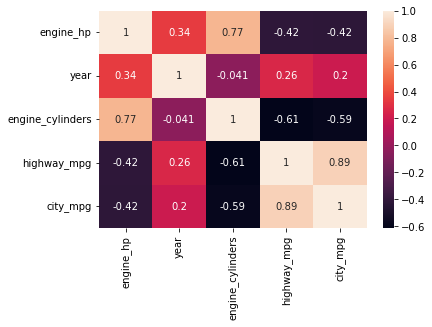

In [11]:
sn.heatmap(corrMatrix, annot=True)



### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.


In [12]:
data['price'].mean()


40594.737032063116

In [13]:

data['above_average'] = (data['price']>data['price'].mean()).astype(int)

data[['price', 'above_average']]

,price,above_average
0,46135,1
1,40650,1
2,36350,0
3,29450,0
4,34500,0
...,...,...
11909,46120,1
11910,56670,1
11911,50620,1
11912,50920,1



### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.


In [14]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)


In [55]:
df_val

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
1918,Volkswagen,Beetle,2015,210.0,4.0,MANUAL,2dr Hatchback,31,23
9951,Audi,SQ5,2015,354.0,6.0,AUTOMATIC,4dr SUV,24,17
5486,Pontiac,Grand Am,2005,140.0,4.0,AUTOMATIC,Sedan,31,22
292,Nissan,350Z,2009,306.0,6.0,MANUAL,Convertible,24,17
3644,Ford,E-150,1996,199.0,6.0,AUTOMATIC,Passenger Van,15,11
...,...,...,...,...,...,...,...,...,...
4385,Ford,Explorer Sport,2003,203.0,6.0,AUTOMATIC,2dr SUV,19,14
7339,Subaru,Outback,2016,175.0,4.0,AUTOMATIC,4dr SUV,33,25
9806,GMC,Sonoma,2003,190.0,6.0,MANUAL,Extended Cab Pickup,17,12
11162,Aston Martin,V8 Vantage,2015,430.0,8.0,AUTOMATED_MANUAL,Coupe,21,14


In [15]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']


### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `transmission_type`



In [16]:
categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)
categorical_columns

['make', 'model', 'transmission_type', 'vehicle_style']

In [17]:
from sklearn.metrics import mutual_info_score

def mutual_info_price_score(series):
    return mutual_info_score(series, df_full_train.above_average)

mi = df_full_train[categorical_columns].apply(mutual_info_price_score)
mi.sort_values(ascending=True)


transmission_type    0.020884
vehicle_style        0.083390
make                 0.238724
model                0.460994
dtype: float64


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.95


In [18]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

X_train

array([[1.500e+01, 6.000e+00, 2.250e+02, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [1.700e+01, 6.000e+00, 2.760e+02, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [1.200e+01, 1.000e+01, 5.700e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [1.700e+01, 6.000e+00, 2.600e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [1.900e+01, 4.000e+00, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        1.993e+03],
       [1.700e+01, 6.000e+00, 3.650e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [19]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [20]:
y_pred = model.predict_proba(X_train)[:, 1]
y_pred

array([6.89820947e-03, 2.85769927e-02, 9.99971609e-01, ...,
       1.81248534e-02, 5.73312727e-06, 2.86360298e-01])

In [21]:
average_aa = (y_pred>=0.5)

In [22]:
(y_train == average_aa).mean().round(2)

0.95



### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `city_mpg`

> **Note**: the difference doesn't have to be positive



In [23]:
all_features = categorical_columns + numerical

In [24]:

def compute_elim(features):

    dv = DictVectorizer(sparse=False)

    train_dict = df_train[features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_train)[:, 1]

    average_aa = (y_pred>=0.5)

    accuracy = (y_train == average_aa).mean()

    return accuracy

accuracy_full = compute_elim(all_features)



In [25]:
to_elim = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
min_feature = None
min_diff = 1e3
min_accuracy = 1e3
for feature in to_elim:
    print(feature)
    new_features = all_features.copy()
    new_features.remove(feature)
    new_accuracy = compute_elim(new_features)

    diff = accuracy_full-new_accuracy

    if np.abs(diff) < min_diff:
        min_accuracy = new_accuracy
        min_feature = feature

    print(f'Full accuracy: {accuracy_full}. Without {feature}: {new_accuracy}. Difference: {diff}')

print(f'the least useful feature is {min_feature}.')

year
Full accuracy: 0.9532736429770565. Without year: 0.9557918298824846. Difference: -0.0025181869054280437
engine_hp
Full accuracy: 0.9532736429770565. Without engine_hp: 0.9385842193620593. Difference: 0.014689423614997255
transmission_type
Full accuracy: 0.9532736429770565. Without transmission_type: 0.9511751538891998. Difference: 0.002098489087856703
city_mpg
Full accuracy: 0.9532736429770565. Without city_mpg: 0.9513150531617236. Difference: 0.001958589815332923
the least useful feature is city_mpg.



### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.



<AxesSubplot:xlabel='price', ylabel='Count'>

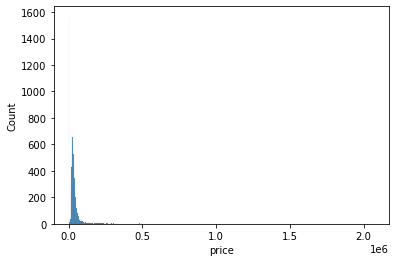

In [26]:
sn.histplot(data.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

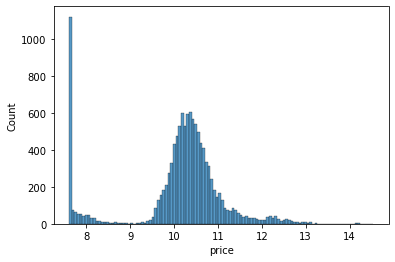

In [27]:
sn.histplot(np.log1p(data.price))

In [28]:
from sklearn.linear_model import Ridge

y_train = np.log1p(df_train.price)
del df_train['price']

y_val = np.log1p(df_val.price)
del df_val['price']


In [29]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20
...,...,...,...,...,...,...,...,...,...
9232,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18
5710,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21
11306,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17
4414,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19


In [30]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [56]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [57]:
val_dict

[{'make': 'Volkswagen',
  'model': 'Beetle',
  'transmission_type': 'MANUAL',
  'vehicle_style': '2dr Hatchback',
  'engine_hp': 210.0,
  'year': 2015,
  'engine_cylinders': 4.0,
  'highway_mpg': 31,
  'city_mpg': 23},
 {'make': 'Audi',
  'model': 'SQ5',
  'transmission_type': 'AUTOMATIC',
  'vehicle_style': '4dr SUV',
  'engine_hp': 354.0,
  'year': 2015,
  'engine_cylinders': 6.0,
  'highway_mpg': 24,
  'city_mpg': 17},
 {'make': 'Pontiac',
  'model': 'Grand Am',
  'transmission_type': 'AUTOMATIC',
  'vehicle_style': 'Sedan',
  'engine_hp': 140.0,
  'year': 2005,
  'engine_cylinders': 4.0,
  'highway_mpg': 31,
  'city_mpg': 22},
 {'make': 'Nissan',
  'model': '350Z',
  'transmission_type': 'MANUAL',
  'vehicle_style': 'Convertible',
  'engine_hp': 306.0,
  'year': 2009,
  'engine_cylinders': 6.0,
  'highway_mpg': 24,
  'city_mpg': 17},
 {'make': 'Ford',
  'model': 'E-150',
  'transmission_type': 'AUTOMATIC',
  'vehicle_style': 'Passenger Van',
  'engine_hp': 199.0,
  'year': 1996,
  

In [61]:
alpha_vals = [0, 0.01, 0.1, 1, 10]

alpha_df = pd.DataFrame(index = alpha_vals)
alpha_df['rmse'] = np.nan

for alpha in alpha_vals:
    model = Ridge(solver='sag', random_state=42, alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    rmse_val = rmse(y_val, y_pred)

    alpha_df.loc[alpha, 'rmse'] = rmse_val

    print(f'Alpha: {alpha}. RMSE: {rmse_val}')



Alpha: 0. RMSE: 0.4940098299300894
Alpha: 0.01. RMSE: 0.4940099838768753
Alpha: 0.1. RMSE: 0.49401136935655576
Alpha: 1. RMSE: 0.494025220714674
Alpha: 10. RMSE: 0.49425040974751533


In [64]:
alpha_df.sort_values(by='rmse').round(3)

,rmse
0.00,0.494
0.01,0.494
0.10,0.494
1.00,0.494
10.00,0.494



## Submit the results

* Submit your results here: https://forms.gle/FFfNjEP4jU4rxnL26
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 2 October (Monday), 23:00 CEST.

After that, the form will be closed.
